In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/33 [..............................] - ETA: 8s - loss: 1.5977 - accuracy: 0.1797
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 5ms/step - loss: 1.5313 - accuracy: 0.2877 - val_loss: 1.4547 - val_accuracy: 0.3592
Epoch 2/1000
 1/33 [..............................] - ETA: 0s - loss: 1.4749 - accuracy: 0.3125
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 1.4292 - accuracy: 0.3530 - val_loss: 1.3397 - val_accuracy: 0.5675
Epoch 3/1000
 1/33 [..............................] - ETA: 0s - loss: 1.4017 - accuracy: 0.3281
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 1.3584 - accuracy: 0.4050 - val_loss: 1.2410 - val_accuracy: 0.6437
Epoch 4/1000
 1/33 [..............................] - ETA: 0s - loss: 1.2872 - accuracy: 0.4609
E

 1/33 [..............................] - ETA: 0s - loss: 0.7361 - accuracy: 0.7109
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.8094 - accuracy: 0.6973 - val_loss: 0.4385 - val_accuracy: 0.9289
Epoch 29/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7933 - accuracy: 0.7109
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.8014 - accuracy: 0.6869 - val_loss: 0.4398 - val_accuracy: 0.9289
Epoch 30/1000
 1/33 [..............................] - ETA: 0s - loss: 0.8212 - accuracy: 0.6406
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7844 - accuracy: 0.6973 - val_loss: 0.4174 - val_accuracy: 0.9347
Epoch 31/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6638 - accuracy: 0.7891
Epoch 31

 1/33 [..............................] - ETA: 0s - loss: 0.6733 - accuracy: 0.7422
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.7443 - val_loss: 0.3155 - val_accuracy: 0.9579
Epoch 56/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6821 - accuracy: 0.7578
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.7278 - val_loss: 0.3216 - val_accuracy: 0.9470
Epoch 57/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7117 - accuracy: 0.7578
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.7564 - val_loss: 0.3179 - val_accuracy: 0.9492
Epoch 58/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7395 - accuracy: 0.7500
Epoch 58

 1/33 [..............................] - ETA: 0s - loss: 0.6482 - accuracy: 0.7734
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.7660 - val_loss: 0.2899 - val_accuracy: 0.9557
Epoch 83/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6952 - accuracy: 0.7812
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7547 - val_loss: 0.2856 - val_accuracy: 0.9572
Epoch 84/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7204 - accuracy: 0.7422
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.7489 - val_loss: 0.2898 - val_accuracy: 0.9536
Epoch 85/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5633 - accuracy: 0.7422
Epoch 85

 1/33 [..............................] - ETA: 0s - loss: 0.5497 - accuracy: 0.7812
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.7767 - val_loss: 0.2698 - val_accuracy: 0.9565
Epoch 110/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4908 - accuracy: 0.8672
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7561 - val_loss: 0.2704 - val_accuracy: 0.9536
Epoch 111/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5525 - accuracy: 0.7656
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7769 - val_loss: 0.2740 - val_accuracy: 0.9543
Epoch 112/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7204 - accuracy: 0.7109
Ep

Epoch 136/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6348 - accuracy: 0.7578
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.7772 - val_loss: 0.2569 - val_accuracy: 0.9543
Epoch 137/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6015 - accuracy: 0.7891
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.7825 - val_loss: 0.2573 - val_accuracy: 0.9550
Epoch 138/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5015 - accuracy: 0.8438
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.7818 - val_loss: 0.2654 - val_accuracy: 0.9536
Epoch 139/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7400 - accu

Epoch 163/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5617 - accuracy: 0.7656
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7786 - val_loss: 0.2531 - val_accuracy: 0.9499
Epoch 164/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5929 - accuracy: 0.8125
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7854 - val_loss: 0.2517 - val_accuracy: 0.9485
Epoch 165/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6091 - accuracy: 0.7500
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7883 - val_loss: 0.2500 - val_accuracy: 0.9550
Epoch 166/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5469 - accu

Epoch 190/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6021 - accuracy: 0.8047
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7837 - val_loss: 0.2517 - val_accuracy: 0.9507
Epoch 191/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7812
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7972 - val_loss: 0.2620 - val_accuracy: 0.9448
Epoch 192/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6956 - accuracy: 0.7500
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7873 - val_loss: 0.2466 - val_accuracy: 0.9543
Epoch 193/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4632 - accu

Epoch 217/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4484 - accuracy: 0.8516
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7912 - val_loss: 0.2575 - val_accuracy: 0.9463
Epoch 218/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5827 - accuracy: 0.8047
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7941 - val_loss: 0.2428 - val_accuracy: 0.9514
Epoch 219/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5141 - accuracy: 0.8203
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7999 - val_loss: 0.2506 - val_accuracy: 0.9448
Epoch 219: early stopping


In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 900us/step - loss: 0.2506 - accuracy: 0.9448


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 55ms/step
[9.4722784e-01 4.9855929e-02 2.7606706e-03 8.3130188e-05 7.2478462e-05]
0


# 混同行列

44/44 [==============================] - 0s 644us/step


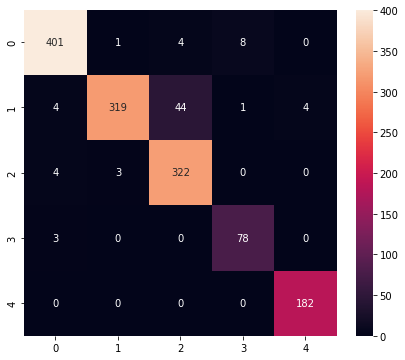

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       414
           1       0.99      0.86      0.92       372
           2       0.87      0.98      0.92       329
           3       0.90      0.96      0.93        81
           4       0.98      1.00      0.99       182

    accuracy                           0.94      1378
   macro avg       0.94      0.95      0.95      1378
weighted avg       0.95      0.94      0.94      1378



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\KaKan\AppData\Local\Temp\tmp9mrxw3ow\assets


6532

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.4722784e-01 4.9855925e-02 2.7606706e-03 8.3130268e-05 7.2478462e-05]
0
